## 데이터 다운로드

In [2]:
%matplotlib inline
import io
import numpy as np
import pandas as pd
import urllib.request

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)

body = response.read().decode('utf-8')
header = ','.join([str(i) for i in range(1, 17)]) + '\n'
data = header + body

In [3]:
df = pd.read_csv(io.StringIO(data), delimiter=',', index_col=False)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.describe()

,3,8,11,15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


### Y 전처리
1: +<br/>
0: -

In [5]:
df['16'].replace(to_replace=['+', '-'], value=[1, 0], inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


### Nan 데이터 제거
?값인 데이터는 모두 제거

In [6]:
df.replace(to_replace='?', value=np.nan, inplace=True)
df = df.dropna()

In [7]:
df.describe()

,3,8,11,15,16
count,653.000000,653.000000,653.000000,653.000000,653.000000
mean,4.829533,2.244296,2.502297,1013.761103,0.453292
std,5.027077,3.371120,4.968497,5253.278504,0.498195
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.165000,0.000000,0.000000,0.000000
50%,2.835000,1.000000,0.000000,5.000000,0.000000
75%,7.500000,2.625000,3.000000,400.000000,1.000000
max,28.000000,28.500000,67.000000,100000.000000,1.000000


## 데이터 타입 변경
연속형 데이터들은 string type에서 float type으로 변경

In [8]:
continuous_columns = ['2', '3', '8', '11', '14', '15']
n_df = df.copy()
n_df[continuous_columns] = df[continuous_columns].astype(float)
n_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


범주형 데이터들은 아래와 같은 데이터 범주를 가짐. 전부 categorical 변수로 변경 

categorical column에는 다음과 같은 고유 문자들이 존재함.
이를 onehot encoding하기 위해 integer로 mapping하는 vocabulary를 생성함

In [9]:
categorical_columns = ['1', '4', '5', '6', '7', '9', '10', '12', '13']
categorical_set = {}
for col in categorical_columns:
    categorical_set[col] = { v : k for k, v in enumerate(set(n_df[col].values))}
    print(col, set(n_df[col].values))

1 {'b', 'a'}
4 {'u', 'l', 'y'}
5 {'g', 'gg', 'p'}
6 {'j', 'w', 'c', 'cc', 'i', 'd', 'r', 'x', 'm', 'e', 'aa', 'ff', 'k', 'q'}
7 {'bb', 'h', 'j', 'o', 'z', 'n', 'v', 'dd', 'ff'}
9 {'t', 'f'}
10 {'t', 'f'}
12 {'t', 'f'}
13 {'g', 's', 'p'}


In [10]:
for col in categorical_columns:
    n_df[col].replace(to_replace=list(categorical_set[col].keys()),
                      value=list(categorical_set[col].values()), inplace=True)

In [11]:
n_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,30.83,0.000,0,0,1,6,1.25,0,0,1.0,1,0,202.0,0.0,1
1,1,58.67,4.460,0,0,13,1,3.04,0,0,6.0,1,0,43.0,560.0,1
2,1,24.50,0.500,0,0,13,1,1.50,0,1,0.0,1,0,280.0,824.0,1
3,0,27.83,1.540,0,0,1,6,3.75,0,0,5.0,0,0,100.0,3.0,1
4,0,20.17,5.625,0,0,1,6,1.71,0,1,0.0,1,1,120.0,0.0,1


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
one = OneHotEncoder(sparse=False)

scaled_columns = scaler.fit_transform(n_df[continuous_columns])
encoded_columns = one.fit_transform(n_df[categorical_columns])

In [13]:
encoded_columns.shape

(653, 40)

In [14]:
scaled_columns.shape

(653, 6)

### X, Y 데이터 셋 준비

In [15]:
X = np.concatenate([scaled_columns, encoded_columns], axis=1)
Y = n_df['16'].values

In [16]:
X.shape, Y.shape

((653, 46), (653,))

# Canonical models

### SVM classifier

In [17]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

clf = svm.SVC()
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred = clf.predict(X)
acc_score = metrics.accuracy_score(Y, pred)
cls_report = metrics.classification_report(Y, pred)
print(cls_report)
print(acc_score)

             precision    recall  f1-score   support

          0       0.94      0.80      0.87       357
          1       0.80      0.94      0.86       296

avg / total       0.88      0.87      0.87       653

0.8652373660030628


## 10-Fold cross validation for SVM

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

acc_score_list, f1_score_list, precision_list, recall_list = [], [], [], []
cm_list = []

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
score = 'accuracy'

cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    x_train, y_train = X[train_index], Y[train_index]
    x_test, y_test = X[test_index], Y[test_index]

#     clf = GridSearchCV(svm.SVC(random_state=0), tuned_parameters, cv=5,
#                         scoring=score)
    clf = svm.SVC(kernel='rbf', C=1, gamma=0.01, random_state=0)
    clf.fit(x_train, y_train)

#     print(clf.best_params_)
#     print(clf.best_score_)

    pred = clf.predict(x_test)
    acc_score_list.append(metrics.accuracy_score(y_test, pred))
    f1_score_list.append(metrics.f1_score(y_test, pred, average=None))
    precision_list.append(metrics.precision_score(y_test, pred))
    recall_list.append(metrics.recall_score(y_test, pred))
    cm_list.append(confusion_matrix(y_test, pred))


print('accuracy: {:.2}'.format(np.mean(acc_score_list)))
print('f1-score: {:.2}'.format(np.mean(f1_score_list)))
print('precision: {:.2}'.format(np.mean(precision_list)))
print('recall: {:.2}'.format(np.mean(recall_list)))

accuracy: 0.89
f1-score: 0.89
precision: 0.82
recall: 0.96


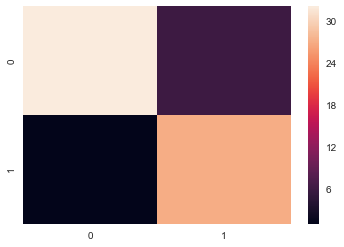

In [27]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

# n_cm = sum(cm_list) // 10
n_cm = sum(cm_list)
df_cm = pd.DataFrame(n_cm)
sn.set(font_scale=1)
s = sn.heatmap(df_cm, annot=False)
# f = s.get_figure()
# f.savefig('test.png', dpi=100, )

(653, 2)
0.8153846153846154
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        34
          1       0.88      0.71      0.79        31

avg / total       0.83      0.82      0.81        65



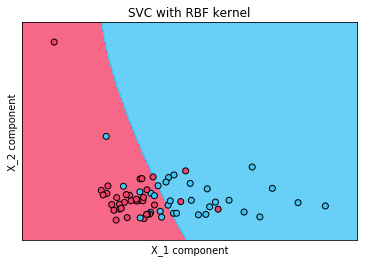

In [345]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
_X = pca.fit_transform(X)
print(_X.shape)

clf = svm.SVC(kernel='rbf', C=1, gamma=0.01, random_state=0)
clf.fit(_X[train_index], Y[train_index])
pred = clf.predict(_X[test_index])
print(metrics.accuracy_score(Y[test_index], pred))
print(metrics.classification_report(Y[test_index], pred))

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = _X[test_index, 0].min() - 1, _X[test_index, 0].max() + 1
y_min, y_max = _X[test_index, 1].min() - 1, _X[test_index, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


# for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
# plt.subplot(2, 2, 0 + 1)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

cm_bright = ListedColormap(['#f4416b', '#42c5f4'])

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm_bright, alpha=0.8)

# Plot also the training points
plt.scatter(_X[test_index, 0],
            _X[test_index, 1],
            c=Y[test_index],
            edgecolors='black',
            cmap=cm_bright)
plt.xlabel('X_1 component')
plt.ylabel('X_2 component')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[2])

plt.show()

## 10-Fold cross validation for Decision Tree

In [232]:
from sklearn import tree

acc_score_list, f1_score_list, precision_list, recall_list = [], [], [], []
cm_list = []

cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i, (train_index, test_index) in enumerate(cv.split(n_df)):
    x_train, y_train = X[train_index], Y[train_index]
    x_test, y_test = X[test_index], Y[test_index]

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    acc_score_list.append(metrics.accuracy_score(y_test, pred))
    f1_score_list.append(metrics.f1_score(y_test, pred, average=None))
    precision_list.append(metrics.precision_score(y_test, pred))
    recall_list.append(metrics.recall_score(y_test, pred))
    cm_list.append(confusion_matrix(y_test, pred))

print('accuracy: {:.2}'.format(np.mean(acc_score_list)))
print('f1-score: {:.2}'.format(np.mean(f1_score_list)))
print('precision: {:.2}'.format(np.mean(precision_list)))
print('recall: {:.2}'.format(np.mean(recall_list)))

accuracy: 0.84
f1-score: 0.84
precision: 0.84
recall: 0.82


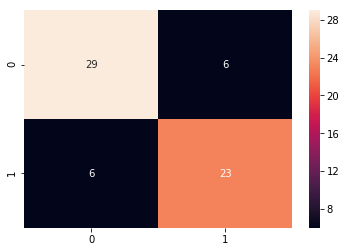

In [121]:
n_cm = sum(cm_list) // 10
df_cm = pd.DataFrame(n_cm)
sn.heatmap(df_cm, annot=True)

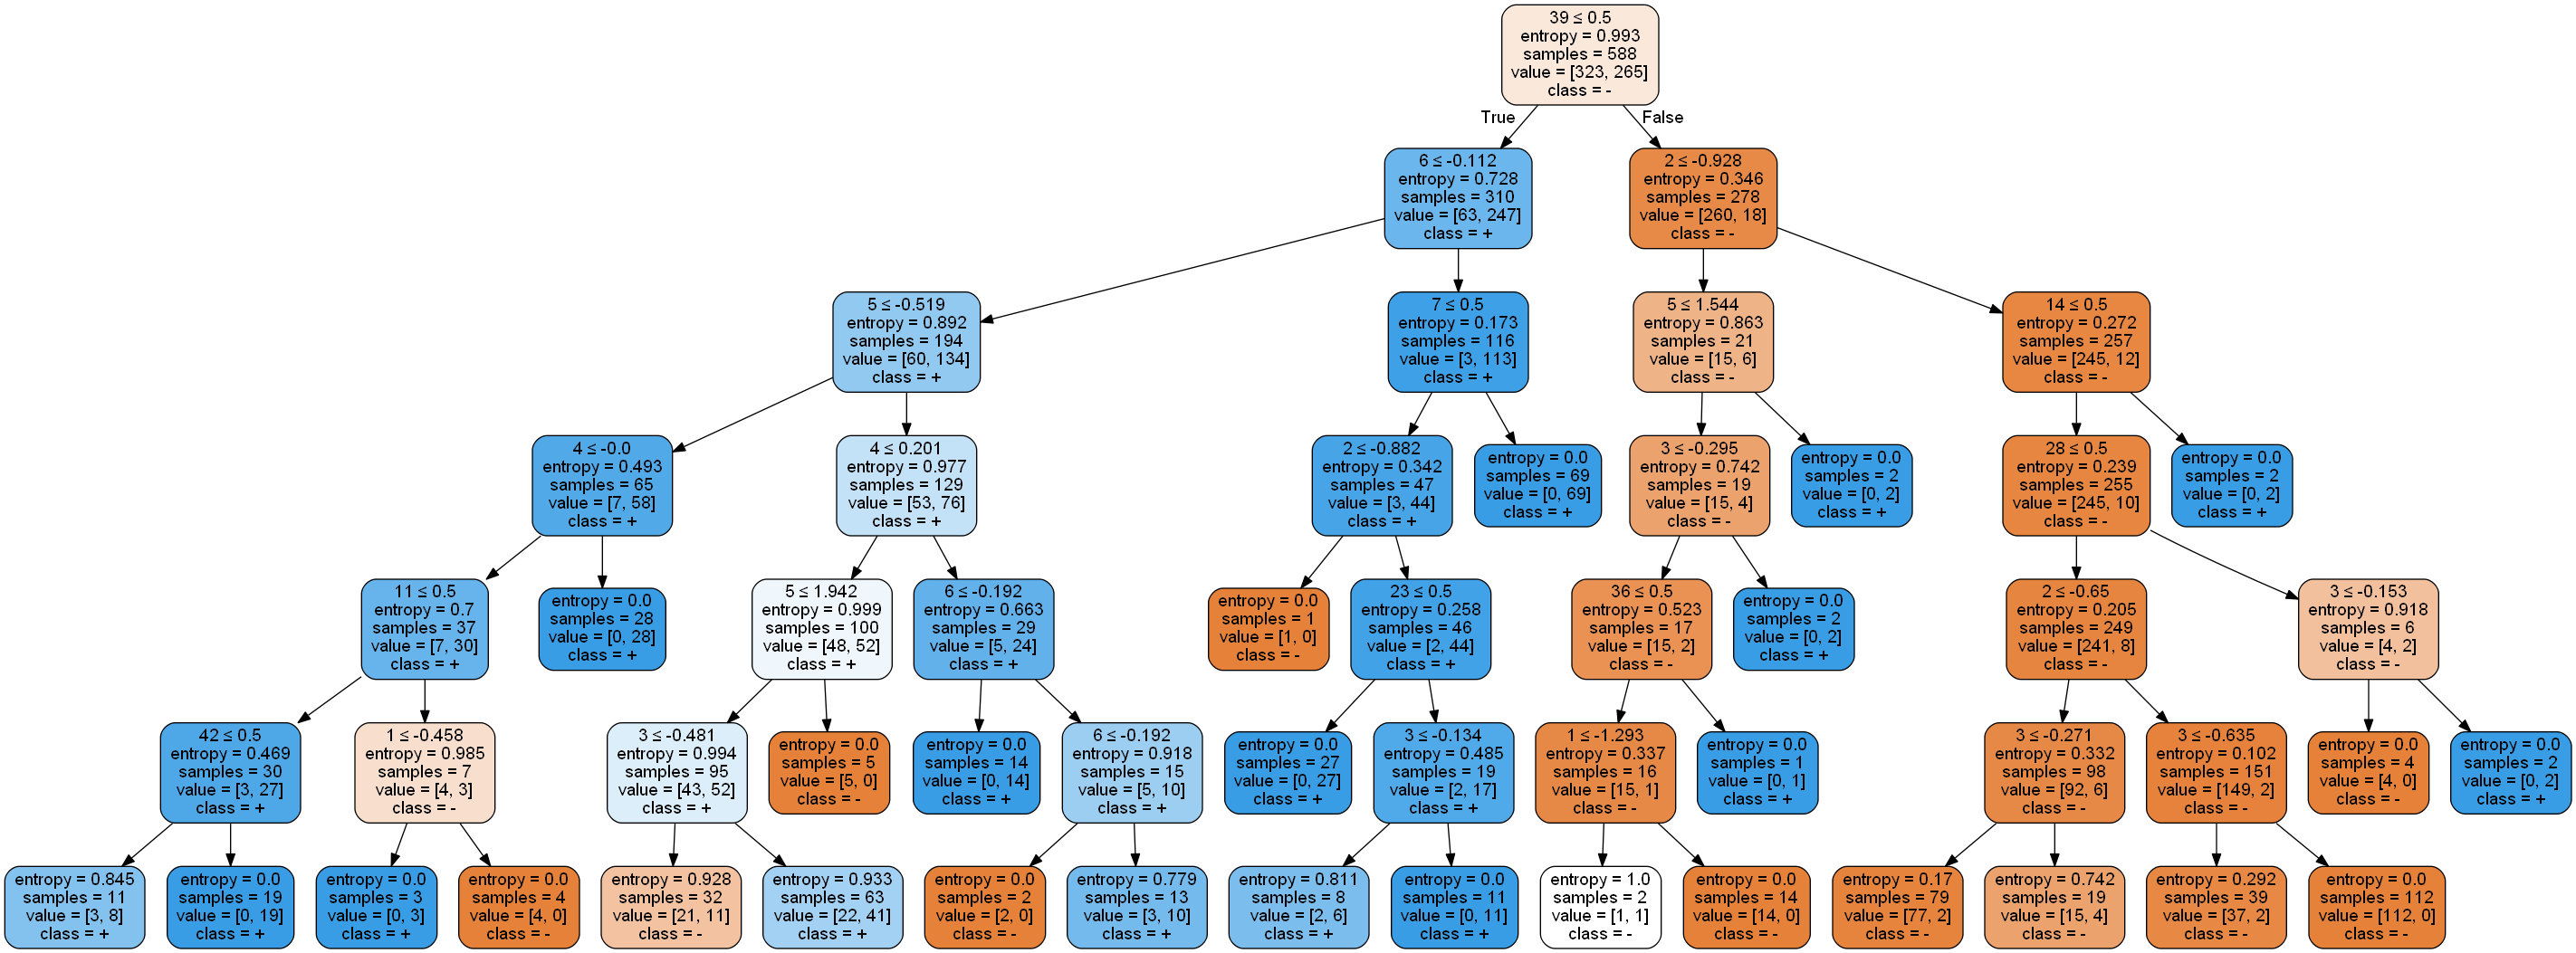

In [235]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, feature_names=[str(i) for i in range(1, 47)],
                          class_names=['-', '+'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Committee Machines

## 10-Fold cross validation for Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

acc_score_list, f1_score_list, precision_list, recall_list = [], [], [], []
cm_list = []

cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i, (train_index, test_index) in enumerate(cv.split(n_df)):
    x_train, y_train = X[train_index], Y[train_index]
    x_test, y_test = X[test_index], Y[test_index]

    clf = RandomForestClassifier(n_estimators=5000, random_state=0)
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    acc_score_list.append(metrics.accuracy_score(y_test, pred))
    f1_score_list.append(metrics.f1_score(y_test, pred, average=None))
    precision_list.append(metrics.precision_score(y_test, pred))
    recall_list.append(metrics.recall_score(y_test, pred))
    cm_list.append(confusion_matrix(y_test, pred))

print('accuracy: {:.2}'.format(np.mean(acc_score_list)))
print('f1-score: {:.2}'.format(np.mean(f1_score_list)))
print('precision: {:.2}'.format(np.mean(precision_list)))
print('recall: {:.2}'.format(np.mean(recall_list)))

accuracy: 0.88
f1-score: 0.88
precision: 0.86
recall: 0.88


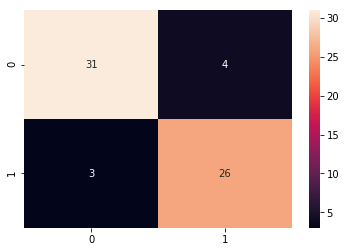

In [187]:
n_cm = sum(cm_list) // 10
df_cm = pd.DataFrame(n_cm)
sn.heatmap(df_cm, annot=True)

## 10-Fold cross validation for Ada Boost

In [184]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

acc_score_list, f1_score_list, precision_list, recall_list = [], [], [], []
cm_list = []

cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i, (train_index, test_index) in enumerate(cv.split(n_df)):
    x_train, y_train = X[train_index], Y[train_index]
    x_test, y_test = X[test_index], Y[test_index]

    d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
    clf = AdaBoostClassifier(base_estimator=d_tree, n_estimators=1000, learning_rate=0.1, random_state=0)
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    acc_score_list.append(metrics.accuracy_score(y_test, pred))
    f1_score_list.append(metrics.f1_score(y_test, pred, average=None))
    precision_list.append(metrics.precision_score(y_test, pred))
    recall_list.append(metrics.recall_score(y_test, pred))
    cm_list.append(confusion_matrix(y_test, pred))

print('accuracy: {:.2}'.format(np.mean(acc_score_list)))
print('f1-score: {:.2}'.format(np.mean(f1_score_list)))
print('precision: {:.2}'.format(np.mean(precision_list)))
print('recall: {:.2}'.format(np.mean(recall_list)))

accuracy: 0.87
f1-score: 0.87
precision: 0.87
recall: 0.85


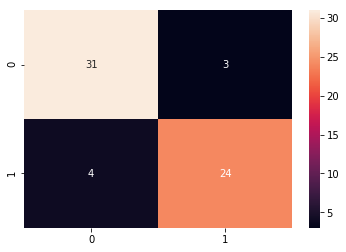

In [185]:
n_cm = sum(cm_list) // 10
df_cm = pd.DataFrame(n_cm)
sn.heatmap(df_cm, annot=True)

# Deep Learning Models

## 10-Fold cross validation for Artificial Neural network

In [230]:
import keras
import keras.backend as K
from keras import regularizers
from keras.models import Model
from keras.layers import Dense, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers.core import Dropout, Activation, Reshape
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

def ANN(input_dim):
    input_dim = 46
    weight_decay = 1e-3

    in_x = Input((input_dim, ), name="x")
    x = Dense(20, kernel_initializer='uniform', name='fc1',
              kernel_regularizer=regularizers.l2(weight_decay))(in_x)
    x = Activation('relu', name='relu_1')(x)
    x = Dense(5, kernel_initializer='uniform', name='fc2',
              kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = Activation('relu', name='relu_2')(x)
    out = Dense(1, activation='sigmoid', name='fc_out')(x)
    model = Model(inputs=in_x, outputs=out)
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    model.summary()
    return model

In [226]:
input_dim = 46
threshold = 0.5

acc_score_list, f1_score_list, precision_list, recall_list = [], [], [], []
cm_list = []

cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i, (train_index, test_index) in enumerate(cv.split(n_df)):
    x_train, y_train = X[train_index], Y[train_index]
    x_test, y_test = X[test_index], Y[test_index]

    clf = ANN(input_dim)
    clf.fit(x_train, y_train, epochs=20)

    _pred = clf.predict(x_test)
    pred = (_pred >= threshold).astype(int).reshape(-1)

    acc_score_list.append(metrics.accuracy_score(y_test, pred))
    f1_score_list.append(metrics.f1_score(y_test, pred, average=None))
    precision_list.append(metrics.precision_score(y_test, pred))
    recall_list.append(metrics.recall_score(y_test, pred))
    cm_list.append(confusion_matrix(y_test, pred))

print('accuracy: {:.2}'.format(np.mean(acc_score_list)))
print('f1-score: {:.2}'.format(np.mean(f1_score_list)))
print('precision: {:.2}'.format(np.mean(precision_list)))
print('recall: {:.2}'.format(np.mean(recall_list)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 46)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 20)                940       
_________________________________________________________________
fc2 (Dense)                  (None, 5)                 105       
_________________________________________________________________
fc_out (Dense)               (None, 1)                 6         
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
587/587 [==============================] - 3s 6ms/step - loss: 0.6878 - acc: 0.5468
Epoch 2/20
587/587 [==============================] - 0s 221us/step - loss: 0.6604 - acc: 0.6865
Epoch 3/20
587/587 [==============================] - 0s 200us/step - loss: 0.61

588/588 [==============================] - 0s 209us/step - loss: 0.2960 - acc: 0.8861
Epoch 16/20
588/588 [==============================] - 0s 224us/step - loss: 0.2928 - acc: 0.8895
Epoch 17/20
588/588 [==============================] - 0s 220us/step - loss: 0.2917 - acc: 0.8827
Epoch 18/20
588/588 [==============================] - 0s 214us/step - loss: 0.2893 - acc: 0.8946
Epoch 19/20
588/588 [==============================] - 0s 210us/step - loss: 0.2877 - acc: 0.8946
Epoch 20/20
588/588 [==============================] - 0s 192us/step - loss: 0.2871 - acc: 0.8929
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 46)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 20)                940       
_________________________________________________________________
fc2 (Dense)                 

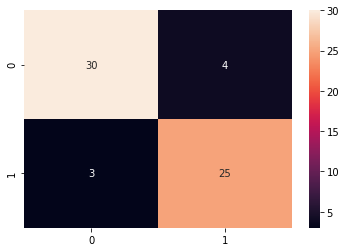

In [227]:
n_cm = sum(cm_list) // 10
df_cm = pd.DataFrame(n_cm)
sn.heatmap(df_cm, annot=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 46)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 20)                940       
_________________________________________________________________
relu_1 (Activation)          (None, 20)                0         
_________________________________________________________________
fc2 (Dense)                  (None, 5)                 105       
_________________________________________________________________
relu_2 (Activation)          (None, 5)                 0         
_________________________________________________________________
fc_out (Dense)               (None, 1)                 6         
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


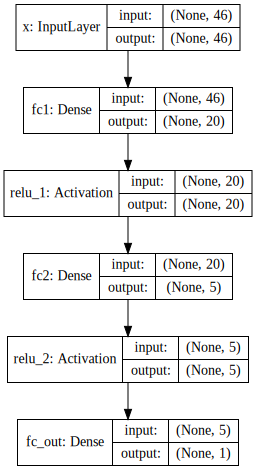

In [231]:
clf = ANN(input_dim)
SVG(model_to_dot(clf, show_shapes=True).create(prog='dot', format='svg'))

## 10-Fold cross validation for CNN

In [223]:
def CNN(input_dim):
    num_filters = 36
    k_size = 7
    weight_decay = 1e-2

    in_x = Input((input_dim, 1), name="x")
    x = Conv1D(num_filters, k_size,
               activation='relu', padding='same', name='conv1d_1')(in_x)
    x = MaxPooling1D(2, name='max_pooling_1d')(x)
    x = Conv1D(num_filters, k_size,
               activation='relu', padding='same', name='conv1d_2')(x)
    x = GlobalMaxPooling1D(name='global_max_pooling_1d')(x)
    x = Dense(6, name='fc_1',
              kernel_initializer='uniform',
              kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = BatchNormalization(name='batch_norm')(x)
    x = Activation('relu', name='relu')(x)
    x = Dropout(rate=0.2, name='dropout')(x)
    out = Dense(1, activation='sigmoid', name='cnn_out')(x)
    model = Model(inputs=in_x, outputs=out)
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    model.summary()
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 46, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 36)            288       
_________________________________________________________________
max_pooling_1d (MaxPooling1D (None, 23, 36)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 23, 36)            9108      
_________________________________________________________________
global_max_pooling_1d (Globa (None, 36)                0         
_________________________________________________________________
fc_1 (Dense)                 (None, 6)                 222       
_________________________________________________________________
batch_norm (BatchNormalizati (None, 6)                 24        
__________

Epoch 1/20
587/587 [==============================] - 3s 5ms/step - loss: 0.6650 - acc: 0.5980
Epoch 2/20
587/587 [==============================] - 0s 274us/step - loss: 0.5551 - acc: 0.7819
Epoch 3/20
587/587 [==============================] - 0s 274us/step - loss: 0.4657 - acc: 0.7956
Epoch 4/20
587/587 [==============================] - 0s 260us/step - loss: 0.3884 - acc: 0.8467
Epoch 5/20
587/587 [==============================] - 0s 270us/step - loss: 0.3500 - acc: 0.8637
Epoch 6/20
587/587 [==============================] - 0s 263us/step - loss: 0.3216 - acc: 0.8859
Epoch 7/20
587/587 [==============================] - 0s 272us/step - loss: 0.3091 - acc: 0.8893
Epoch 8/20
587/587 [==============================] - 0s 291us/step - loss: 0.2935 - acc: 0.8978
Epoch 9/20
587/587 [==============================] - 0s 250us/step - loss: 0.2860 - acc: 0.9046
Epoch 10/20
587/587 [==============================] - 0s 241us/step - loss: 0.2852 - acc: 0.9080
Epoch 11/20
587/587 [==========

Epoch 1/20
588/588 [==============================] - 4s 6ms/step - loss: 0.6771 - acc: 0.5442
Epoch 2/20
588/588 [==============================] - 0s 282us/step - loss: 0.6233 - acc: 0.7398
Epoch 3/20
588/588 [==============================] - 0s 270us/step - loss: 0.5373 - acc: 0.7959
Epoch 4/20
588/588 [==============================] - 0s 258us/step - loss: 0.4294 - acc: 0.8469
Epoch 5/20
588/588 [==============================] - 0s 251us/step - loss: 0.3693 - acc: 0.8759
Epoch 6/20
588/588 [==============================] - 0s 268us/step - loss: 0.3468 - acc: 0.8639
Epoch 7/20
588/588 [==============================] - 0s 254us/step - loss: 0.3208 - acc: 0.8963
Epoch 8/20
588/588 [==============================] - 0s 285us/step - loss: 0.3186 - acc: 0.8929
Epoch 9/20
588/588 [==============================] - 0s 249us/step - loss: 0.3146 - acc: 0.9014
Epoch 10/20
588/588 [==============================] - 0s 292us/step - loss: 0.3075 - acc: 0.8963
Epoch 11/20
588/588 [==========

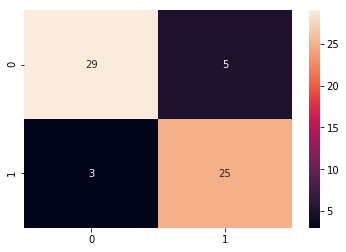

In [224]:
input_dim = 46
threshold = 0.5

acc_score_list, f1_score_list, precision_list, recall_list = [], [], [], []
cm_list = []

cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i, (train_index, test_index) in enumerate(cv.split(n_df)):
    x_train, y_train = X[train_index], Y[train_index]
    x_test, y_test = X[test_index], Y[test_index]

    # reshape
    x_train = x_train.reshape(x_train.shape[0], input_dim, 1)
    x_test = x_test.reshape(x_test.shape[0], input_dim, 1)
    
    clf = CNN(input_dim)
    K.set_learning_phase(1)
    clf.fit(x_train, y_train, epochs=20)
    
    K.set_learning_phase(0)
    _pred = clf.predict(x_test)
    pred = (_pred >= threshold).astype(int).reshape(-1)

    acc_score_list.append(metrics.accuracy_score(y_test, pred))
    f1_score_list.append(metrics.f1_score(y_test, pred, average=None))
    precision_list.append(metrics.precision_score(y_test, pred))
    recall_list.append(metrics.recall_score(y_test, pred))
    cm_list.append(confusion_matrix(y_test, pred))

print('accuracy: {:.2}'.format(np.mean(acc_score_list)))
print('f1-score: {:.2}'.format(np.mean(f1_score_list)))
print('precision: {:.2}'.format(np.mean(precision_list)))
print('recall: {:.2}'.format(np.mean(recall_list)))

n_cm = sum(cm_list) // 10
df_cm = pd.DataFrame(n_cm)
sn.heatmap(df_cm, annot=True)

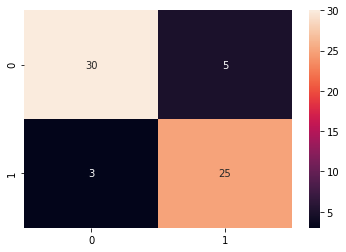

In [131]:
n_cm = sum(cm_list) // 10
df_cm = pd.DataFrame(n_cm)
sn.heatmap(df_cm, annot=True)

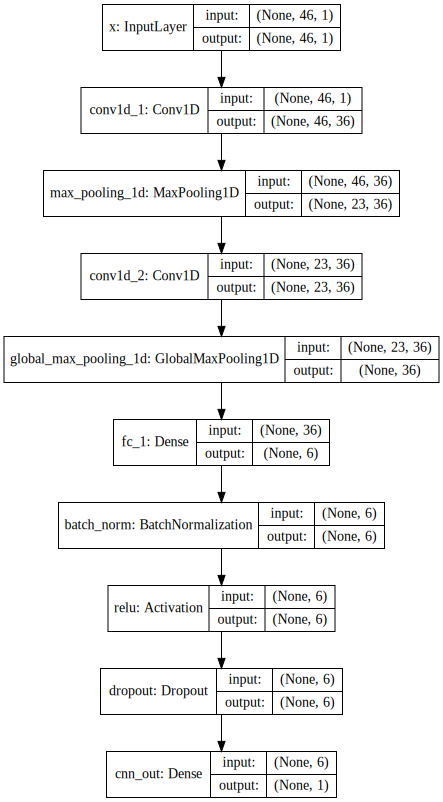

In [287]:
SVG(model_to_dot(clf, show_shapes=True).create(prog='dot', format='svg'))